# Tecnologico de Costa Rica

# Programa de MSc en Sistemas Embedidos

# Curso: Reconocimiento de patrones


# Investigacion 1


# Estudiante: Carlos Lopez Calderon



El presente documento de Jupyter Notebook, tiene como objetivo desarrollar el concepto de procesado y analisis exploratio de datos (EDAS por sus siglas en ingles) utilizando para ello un conjunto de datos o dataset de tipo2 durante la investigacion 1.

Segun [1] se denomina un set de datos de mediana complejidad, a aquel conjunto que requiere ejecutar varios pasos de procesado debido a la cantidad de variables o informacion incognita, es decir toda la informacion no esta presente para tomar una decision o realizar conclusiones debido a que es necesario aplicar ciertos pasos como estandarizar, identificar outliers o transformar los datos.   

Con el proposito de desarrollar dicha investigacion se utiliza el set de datos: "E-commerce" obtenido de https://www.kaggle.com/carrie1/ecommerce-data

Contexto del set de datos:

El sitio UCI Machine Learning Repository ha creado este conjunto de datos que contiene transacciones reales de 2010 y 2011 para el comercio electronico, para paises de como Inglaterra, Francia, Brazil entre otros

Se procede a cargar las librerias

In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
color = sns.color_palette()

Cargamos el archivo, para el cual es necesario especificar la codificacion del set de datos como ucode8, de lo contrario se recibe un error message debido al formato del archivo csv.

In [137]:
transactions = pd.read_csv("data.csv", encoding = 'ISO-8859-1')

Se visualizan las primeras lineas del archivo:

In [138]:
transactions.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


Se procede a renombrar las columnas para una mejor visualizacion y posteriormente se despliega la informacion

In [139]:

transactions.rename(index=str, columns={'InvoiceNo': 'Numero transaccion',
                              'StockCode' : 'codigo producto',
                              'Description' : 'Producto',
                              'Quantity' : 'Cantidad',
                              'InvoiceDate' : 'Fecha de transaccion',
                              'UnitPrice' : 'Precio',
                              'CustomerID' : 'ID_Cliente',
                              'Country' : 'Pais'}, inplace=True)

In [140]:
transactions.head()

,Numero transaccion,codigo producto,Producto,Cantidad,Fecha de transaccion,Precio,ID_Cliente,Pais
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


Ahora se procede a verificar si existe informacion faltante, esto con el objetivo de verificar que todas las columnas o filas  posean un valor definido.

In [141]:
transactions[transactions.isnull().any(axis=1)].head()

,Numero transaccion,codigo producto,Producto,Cantidad,Fecha de transaccion,Precio,ID_Cliente,Pais
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom


De la anterior tabla, se observa como las filas 622, 1433, 1444, 1445 y 1446 no poseen un cliente asociado, por lo que se procede a remover las filas sin ningun valor por medio de la ejecucion de las siguientes lineas.

In [142]:
transactions_new = transactions.dropna()
transactions_new.isnull().sum().sort_values(ascending=False)

Pais                    0
ID_Cliente              0
Precio                  0
Fecha de transaccion    0
Cantidad                0
Producto                0
codigo producto         0
Numero transaccion      0
dtype: int64

Con el objetivo de verificar si existen valores con cantidades negativas se procede visualizar un resumen de los datos utilizando para ello la media, desviacion standard, quartiles y valores maximos - minimos de las cantidades del total de productos.

In [143]:
transactions_new.describe().round(2)

,Cantidad,Precio,ID_Cliente
count,406829.00,406829.00,406829.00
mean,12.06,3.46,15287.69
std,248.69,69.32,1713.60
min,-80995.00,0.00,12346.00
25%,2.00,1.25,13953.00
50%,5.00,1.95,15152.00
75%,12.00,3.75,16791.00
max,80995.00,38970.00,18287.00


Luego se procede a remover los numeros negativos

In [144]:
transactions_new = transactions_new[transactions_new.Cantidad > 0]

Se visualizan la nueva informacion

In [145]:
transactions_new.describe().round(2)

,Cantidad,Precio,ID_Cliente
count,397924.00,397924.00,397924.00
mean,13.02,3.12,15294.32
std,180.42,22.10,1713.17
min,1.00,0.00,12346.00
25%,2.00,1.25,13969.00
50%,6.00,1.95,15159.00
75%,12.00,3.75,16795.00
max,80995.00,8142.75,18287.00


In [146]:
transactions_new['Total_Gastos'] = transactions_new['Cantidad'] * transactions_new['Precio']

In [147]:
transactions_new.head()

,Numero transaccion,codigo producto,Producto,Cantidad,Fecha de transaccion,Precio,ID_Cliente,Pais,Total_Gastos
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


Se reordena la tabla anterior para una merjor representacion

In [148]:
transactions_new = transactions_new[['Numero transaccion','ID_Cliente','Cantidad','Precio','Total_Gastos','codigo producto','Producto','Pais','Fecha de transaccion']]

Se despliega la informacion

In [149]:
transactions_new.head()

,Numero transaccion,ID_Cliente,Cantidad,Precio,Total_Gastos,codigo producto,Producto,Pais,Fecha de transaccion
0,536365,17850.0,6,2.55,15.30,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom,12/1/2010 8:26
1,536365,17850.0,6,3.39,20.34,71053,WHITE METAL LANTERN,United Kingdom,12/1/2010 8:26
2,536365,17850.0,8,2.75,22.00,84406B,CREAM CUPID HEARTS COAT HANGER,United Kingdom,12/1/2010 8:26
3,536365,17850.0,6,3.39,20.34,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,United Kingdom,12/1/2010 8:26
4,536365,17850.0,6,3.39,20.34,84029E,RED WOOLLY HOTTIE WHITE HEART.,United Kingdom,12/1/2010 8:26


# Analisis de datos

Se desea conocer cuales es la distribucion de las transacciones respecto al precio y para ello se grafica la distribucion

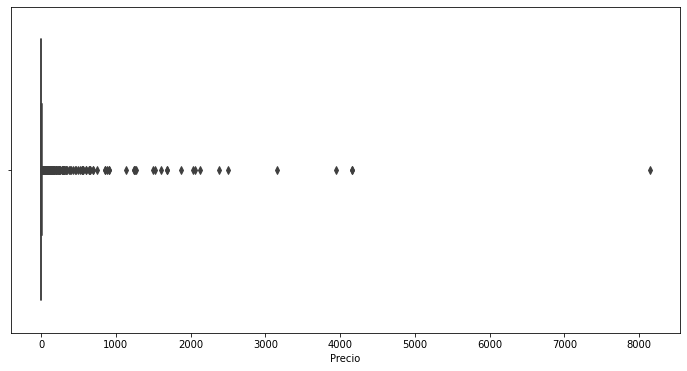

In [153]:

plt.subplots(figsize=(12,6))
sns.boxplot(transactions_new.Precio)
plt.show()

Se observa que existen transacciones con precio 0, lo cual significa que son gratis por alguna razon, para corroborar la informacion se procede a calcular la distribucion estadistica.

In [154]:
transactions_new.Precio.describe()

count    397924.000000
mean          3.116174
std          22.096788
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max        8142.750000
Name: Precio, dtype: float64

De la distribucion anterior se deduce que el precio maximo a pagar por un producto son 8142 y efectivamente existen productos cuya transaccion es gratuita, es decir no representa ningun costo adicional para el cliente

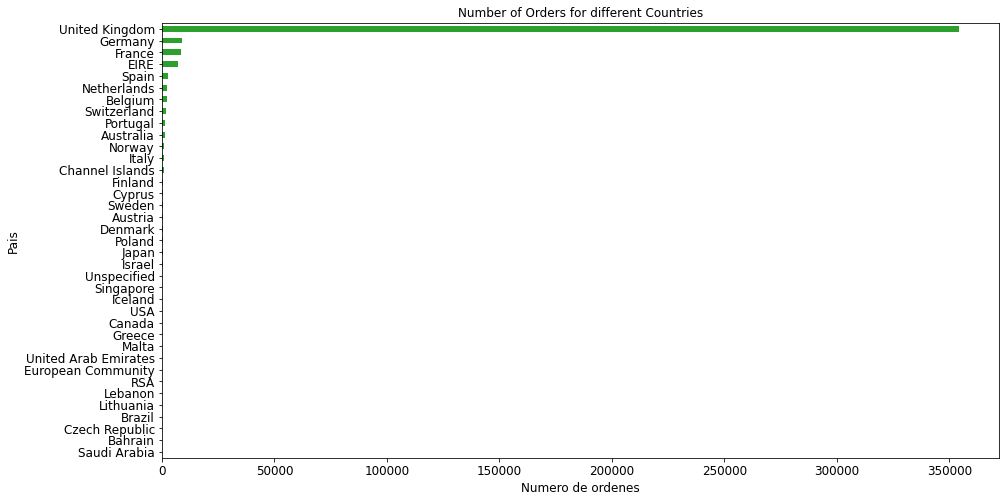

In [160]:
orden_pais = transactions_new.groupby('Pais')['Numero transaccion'].count().sort_values()
plt.subplots(figsize=(15,8))
orden_pais.plot(kind='barh',fontsize=12, color=color[2])
plt.xlabel('Numero de ordenes', fontsize=12)
plt.ylabel('Pais', fontsize=12)
plt.title('Number of Orders for different Countries', fontsize=12)
plt.show()

Con base al grafico anterior se observa que United Kindom es outlier, lo cual no significa que el dato no tenga sentido, sino mas bien que ese pais realiza mayor cantidad de transacciones que los demas, por lo tanto se procede a remover el outlier para verificar si existen transacciones en paises como Brazil o Arabia Saudi.

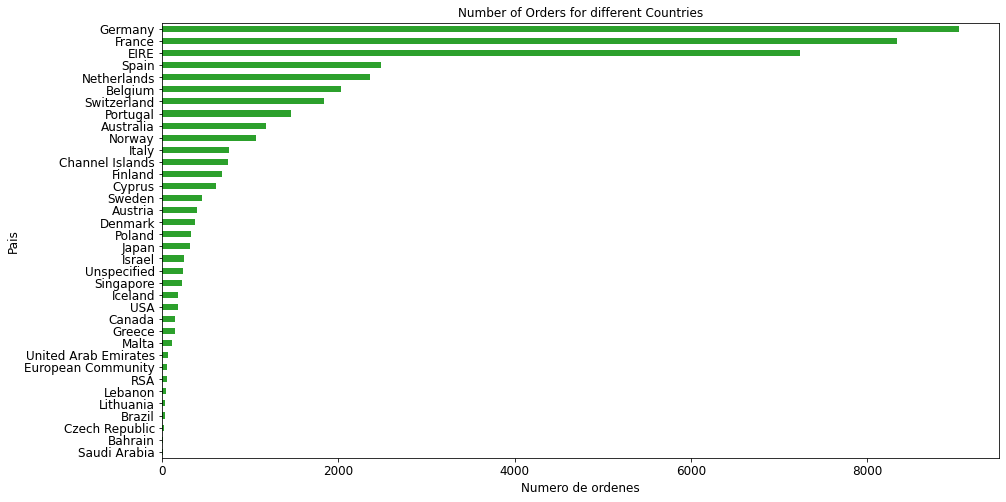

In [161]:
orden_pais = transactions_new.groupby('Pais')['Numero transaccion'].count().sort_values()

del orden_pais['United Kingdom']
plt.subplots(figsize=(15,8))
orden_pais.plot(kind='barh',fontsize=12, color=color[2])
plt.xlabel('Numero de ordenes', fontsize=12)
plt.ylabel('Pais', fontsize=12)
plt.title('Number of Orders for different Countries', fontsize=12)
plt.show()

Luego de verificar la informacion, se tiene que efectivamente Brazil se encuentra entre los paises con menor numero de transacciones de comercio electronico.





References:
[1] https://towardsdatascience.com/exploratory-data-analysis-eda-a-practical-guide-and-template-for-structured-data-abfbf3ee3bd9